#### Live presentation:
https://github.com/damianavila/RISE

#### Convert to html slides:
* https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67
* jupyter nbconvert Jupyter\ Slides.ipynb --to slides --post serve

#### Syntax:
https://sourceforge.net/p/jupiter/wiki/markdown_syntax/

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd

figsize = (10,6)

# VPPlib (working title)
## Sascha Birk
## 08.11.2019 (Revised 02.03.2023)

## Content

+ Background
+ Components of the VPPlib
+ VPPlib Structure
+ VPPlib simulations
+ outlook


# Background: Sectorcoupling-Loadshapegenerator


* Generation of load profiles for battery-electric vehicles and heat pumps
+ use of pv-data from SMA provided by Prof. Waffenschmidt
+ use of electrical demand measured by rng
+ simple electrical storage

![house_model](./presentation/House.png)

# Background: VISE - Regional Virtual Powerplants

![model_graph](./presentation/Zusammenspiel_Teilmodelle.png)

# Components of the VPPlib

* environment class contains all time and weather dependent data

![environment](./presentation/Aufbau_vpplib/environment.png)

In [2]:
from vpplib.environment import Environment

#Values for environment
start = '2015-03-01 00:00:00'
end = '2015-03-01 23:45:00'
year = '2015'
time_freq = "15 min"
timebase = 15

environment = Environment(start=start, end=end, timebase=timebase, year=year, time_freq=time_freq)

* user_profile class contains all user or building specific information

![user_profile](./presentation/Aufbau_vpplib/user_profile.png)

In [3]:
from vpplib.user_profile import UserProfile

#Values for user_profile
identifier = 'CIRE'

user_profile = UserProfile(identifier=identifier)

## componets contain environment and user_profile

![user_profile](./presentation/Aufbau_vpplib/component.png)

# Battery-electric vehicle

In [4]:
from vpplib.battery_electric_vehicle import BatteryElectricVehicle

#Values for bev
unit="kW"
charging_power = 11 #kW
battery_max = 16 #kWh
battery_min = 0 #kWh
battery_usage = 1 #kW
charge_efficiency = 0.98
load_degradation_begin = 0.8

#### Time to get our car...

In [5]:
bev = BatteryElectricVehicle(battery_max=battery_max,
                             battery_min=battery_min, 
                             battery_usage=battery_usage, 
                             charging_power=charging_power, 
                             load_degradation_begin=load_degradation_begin, 
                             charge_efficiency=charge_efficiency,
                             unit=unit,
                             identifier=(identifier+'_bev'),
                             environment=environment,
                             user_profile=user_profile)

#### create a load profile for our car

In [6]:
%%capture
bev.prepare_time_series()

<Axes: title={'center': 'CIRE BEV'}, xlabel='Time'>

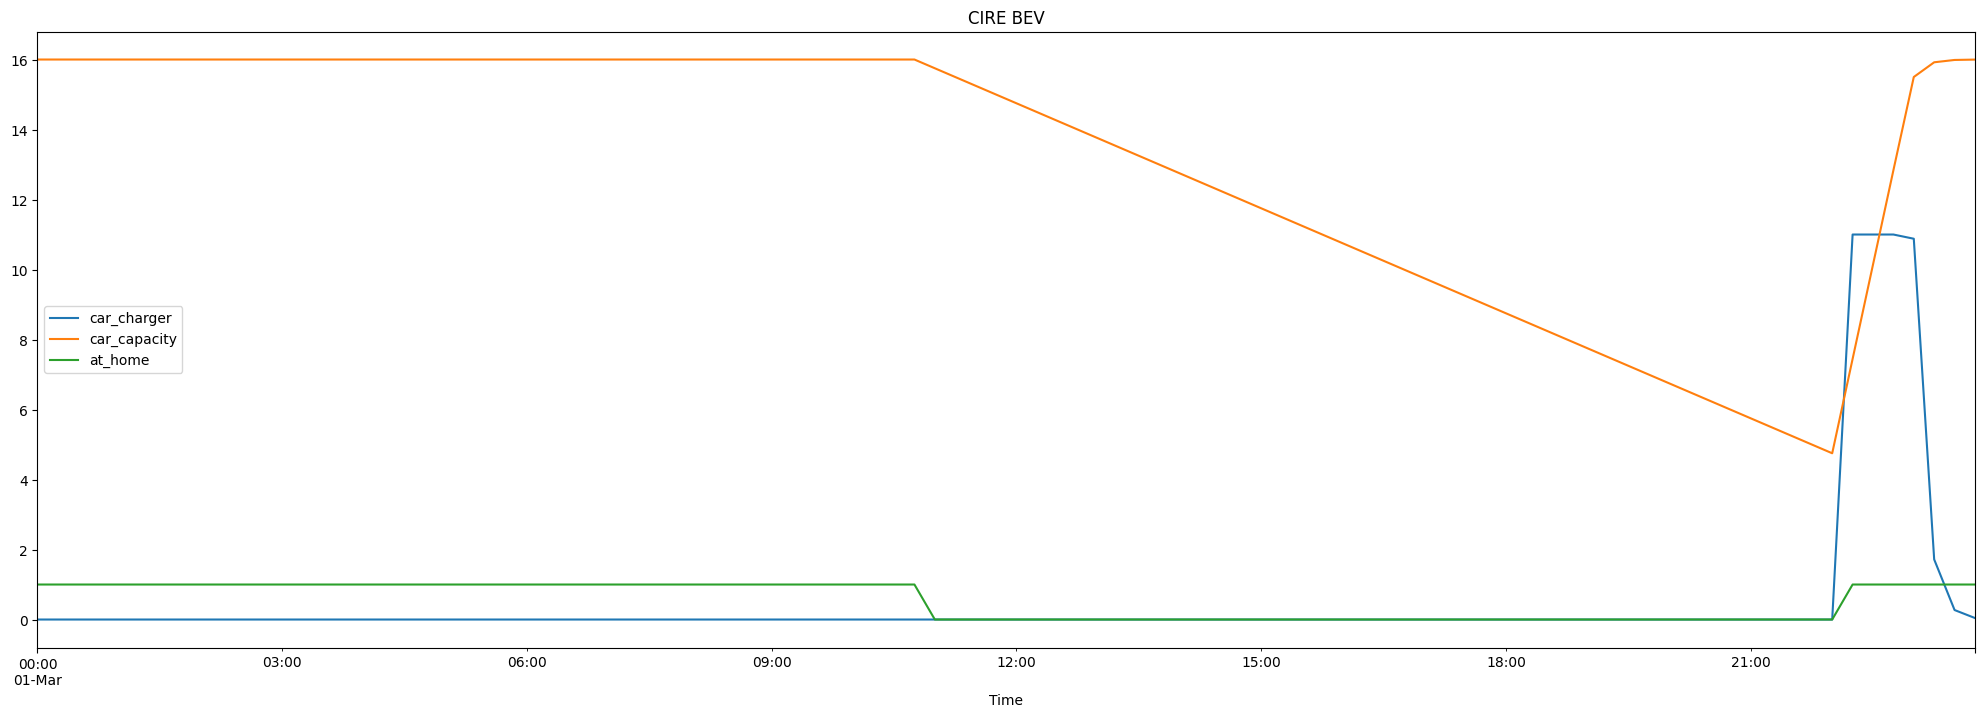

In [7]:
bev.timeseries.plot(figsize=(25, 8), title="CIRE BEV")

# PVlib

* Provides a set of functions and classes for simulating the performance of photovoltaic energy systems
+ Originally ported from the PVLIB MATLAB toolbox developed at Sandia National Laboratories
+ Contains data for pv modules and inverters

## PVlib - retrieve module data

In [8]:
import pvlib
from pvlib import pvsystem

sandia_modules = pvsystem.retrieve_sam(name='SandiaMod')
sandia_modules

Advent_Solar_AS160___2006_  \
Vintage                                                        2006   
Area                                                          1.312   
Material                                                      mc-Si   
Cells_in_Series                                                  72   
Parallel_Strings                                                  1   
Isco                                                          5.564   
Voco                                                         42.832   
Impo                                                          5.028   
Vmpo                                                          32.41   
Aisc                                                       0.000537   
Aimp                                                      -0.000491   
C0                                                           1.0233   
C1                                                          -0.0233   
Bvoco                                                       -0.1703   
Mbvoc                                                             0   
Bvmpo                                                       -0.1731   
Mbvmp                                                             0   
N                                                             1.174   
C2                                                         -0.76444   
C3                                                         -15.5087   
A0                                                           0.9281   
A1                                                          0.06615   
A2                                                         -0.01384   
A3                                                         0.001298   
A4                                                        -0.000046   
B0                                                                1   
B1                                                        -0.002438   
B2                                                          0.00031   
B3                                                        -0.000012   
B4                                                              0.0   
B5                                                             -0.0   
DTC                                                             3.0   
FD                                                                1   
A                                                             -3.35   
B                                                           -0.1161   
C4                                                           0.9974   
C5                                                           0.0026   
IXO                                                            5.54   
IXXO                                                           3.56   
C6                                                            1.173   
C7                                                           -0.173   
Notes             Source: Sandia National Laboratories Updated 9...   

                                   Advent_Solar_Ventura_210___2008_  \
Vintage                                                        2008   
Area                                                          1.646   
Material                                                      mc-Si   
Cells_in_Series                                                  60   
Parallel_Strings                                                  1   
Isco                                                           8.34   
Voco                                                          35.31   
Impo                                                           7.49   
Vmpo                                                          27.61   
Aisc                                                        0.00077   
Aimp                                                       -0.00015   
C0                                                            0.937   
C1                                                            0.

## PVlib - retrieve module data

In [9]:
inverters = pvsystem.retrieve_sam('sandiainverter')
inverters

ABB__MICRO_0_25_I_OUTD_US_208__208V_  \
Vac                                        208   
Pso                                   2.089607   
Paco                                     250.0   
Pdco                                259.588593   
Vdco                                      40.0   
C0                                   -0.000041   
C1                                   -0.000091   
C2                                    0.000494   
C3                                   -0.013171   
Pnt                                      0.075   
Vdcmax                                    50.0   
Idcmax                                6.489715   
Mppt_low                                  30.0   
Mppt_high                                 50.0   
CEC_Date                                   NaN   
CEC_Type                   Utility Interactive   

          ABB__MICRO_0_25_I_OUTD_US_240__240V_  \
Vac                                        240   
Pso                                   2.240412   
Paco                                     250.0   
Pdco                                259.492065   
Vdco                                      40.0   
C0                                   -0.000039   
C1                                   -0.000132   
C2                                    0.002418   
C3                                   -0.014926   
Pnt                                      0.075   
Vdcmax                                    50.0   
Idcmax                                6.487302   
Mppt_low                                  30.0   
Mppt_high                                 50.0   
CEC_Date                                   NaN   
CEC_Type                   Utility Interactive   

          ABB__MICRO_0_3_I_OUTD_US_208__208V_  \
Vac                                       208   
Pso                                  1.846506   
Paco                                    300.0   
Pdco                                311.66925   
Vdco                                     40.0   
C0                                  -0.000033   
C1                                  -0.000192   
C2                                   0.000907   
C3                                  -0.031742   
Pnt                                      0.09   
Vdcmax                                   50.0   
Idcmax                               7.791731   
Mppt_low                                 30.0   
Mppt_high                                50.0   
CEC_Date                                  NaN   
CEC_Type                  Utility Interactive   

          ABB__MICRO_0_3_I_OUTD_US_240__240V_  \
Vac                                       240   
Pso                                  1.950539   
Paco                                    300.0   
Pdco                               311.580872   
Vdco                                     40.0   
C0                                  -0.000034   
C1                                  -0.000256   
C2                                   0.002453   
C3                                  -0.028223   
Pnt                                      0.09   
Vdcmax                                   50.0   
Idcmax                               7.789522   
Mppt_low                                 30.0   
Mppt_high                                50.0   
CEC_Date                                  NaN   
CEC_Type                  Utility Interactive   

          ABB__MICRO_0_3HV_I_OUTD_US_208__208V_  \
Vac                                         208   
Pso                                    1.769444   
Paco                                      300.0   
Pdco                                 312.421082   
Vdco                                       45.0   
C0                                    -0.000045   
C1                                    -0.000196   
C2                                     0.001959   
C3                                    -0.023725   
Pnt                                        0.09   
Vdcmax                                     60.0   
Idcmax                      

In [10]:
inverters.loc['Pdco'] > 500.

ABB__MICRO_0_25_I_OUTD_US_208__208V_                                            False
ABB__MICRO_0_25_I_OUTD_US_240__240V_                                            False
ABB__MICRO_0_3_I_OUTD_US_208__208V_                                             False
ABB__MICRO_0_3_I_OUTD_US_240__240V_                                             False
ABB__MICRO_0_3HV_I_OUTD_US_208__208V_                                           False
ABB__MICRO_0_3HV_I_OUTD_US_240__240V_                                           False
ABB__PVI_10_0_I_OUTD_x_US_208_y__208V_                                           True
ABB__PVI_10_0_I_OUTD_x_US_480_y_z__480V_                                         True
ABB__PVI_12_0_I_OUTD_x_US_480_y__480V_                                           True
ABB__PVI_3_0_OUTD_S_US__208V_                                                    True
ABB__PVI_3_0_OUTD_S_US__240V_                                                    True
ABB__PVI_3_0_OUTD_S_US__277V_                         

# PVlib inside VPPlib

In [11]:
import os
from vpplib.photovoltaic import Photovoltaic

latitude = 50.941357
longitude = 6.958307

user_profile.latitude=latitude
user_profile.longitude=longitude

In [12]:
%%capture
environment.get_pv_data(file=os.path.join(os.path.dirname(os.path.abspath('')),"input/pv/dwd_pv_data_2015.csv"))

## Define and get pv system

In [13]:
module_lib = 'SandiaMod'
module = 'Canadian_Solar_CS5P_220M___2009_'
inverter_lib = 'cecinverter'
inverter = 'ABB__PVI_3_0_OUTD_S_US_A__277V_'
surface_tilt = 20
surface_azimuth = 200
modules_per_string = 6
strings_per_inverter = 4
temp_lib='sapm'
temp_model='open_rack_glass_glass'

In [14]:
pv = Photovoltaic(unit=unit,
                  module_lib=module_lib,
                  inverter_lib=inverter_lib,
                  surface_tilt=surface_tilt,
                  surface_azimuth=surface_azimuth,
                  module=module,
                  inverter=inverter,
                  modules_per_string=modules_per_string,
                  strings_per_inverter=strings_per_inverter,
                  temp_lib=temp_lib,
                  temp_model=temp_model,
                  identifier=(identifier+'_pv'),
                  environment = environment,
                  user_profile = user_profile)

### Get and plot timeseries of pv

<Axes: xlabel='time'>

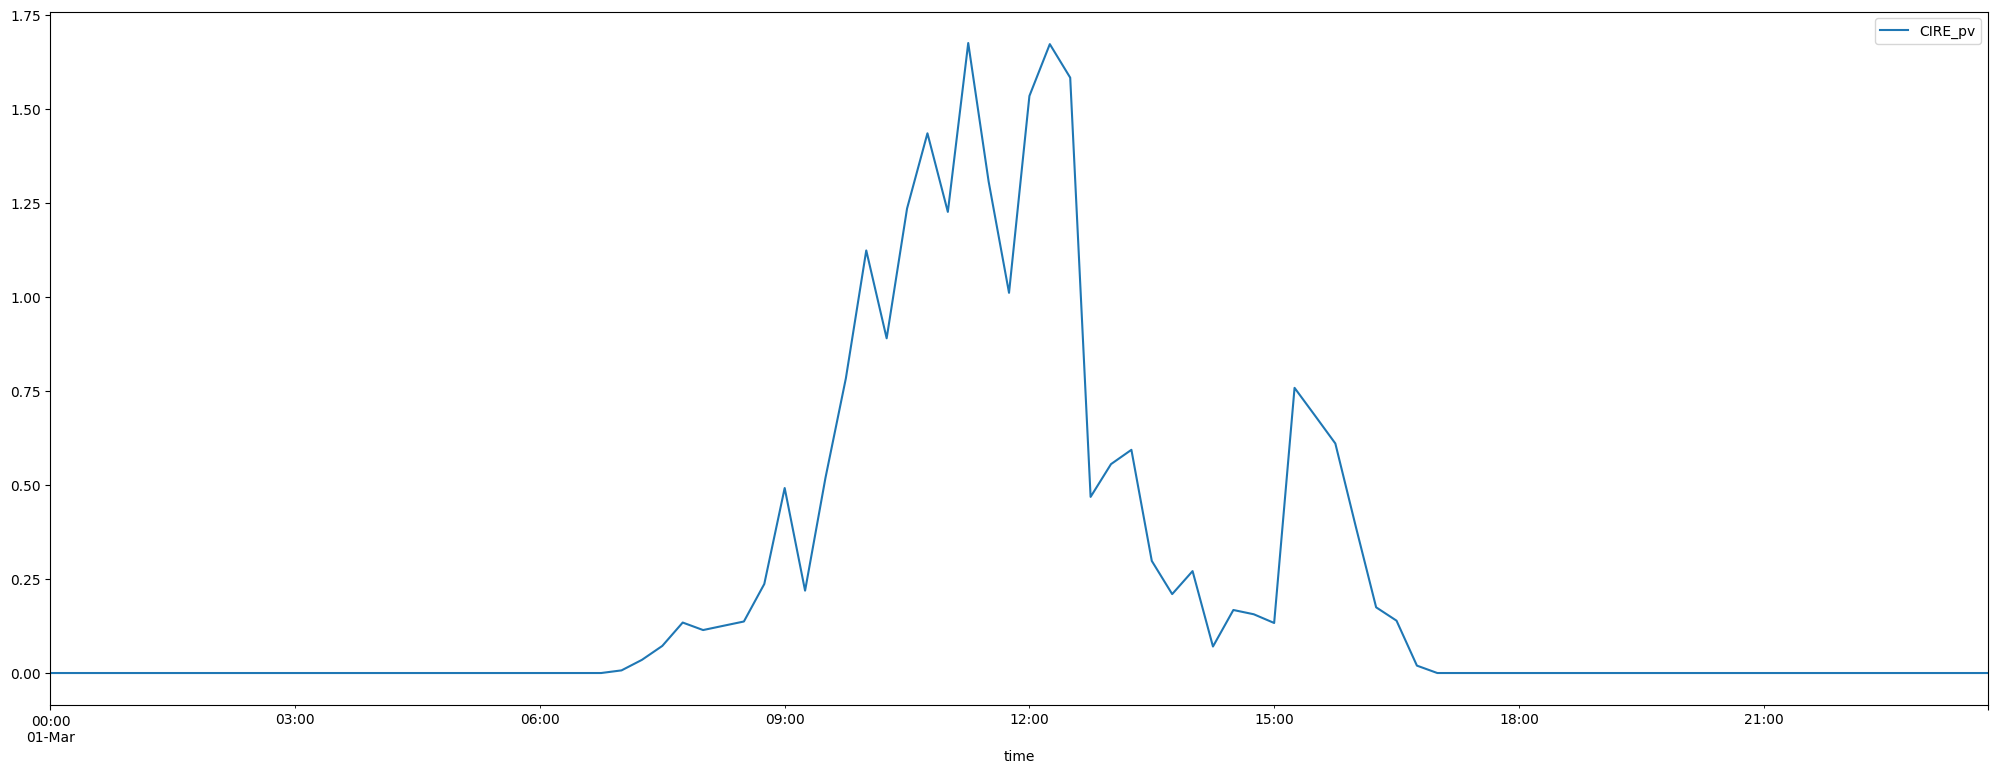

In [15]:
pv.prepare_time_series()

pv.timeseries.plot(figsize=(25,9))

* Additional features:
    + calculate incidence angle modifier
    + calculate module temperature dependent on irradiation, wind, ambient temperature, module and racking type
    + forecasting

# Heat pump

<Axes: xlabel='time'>

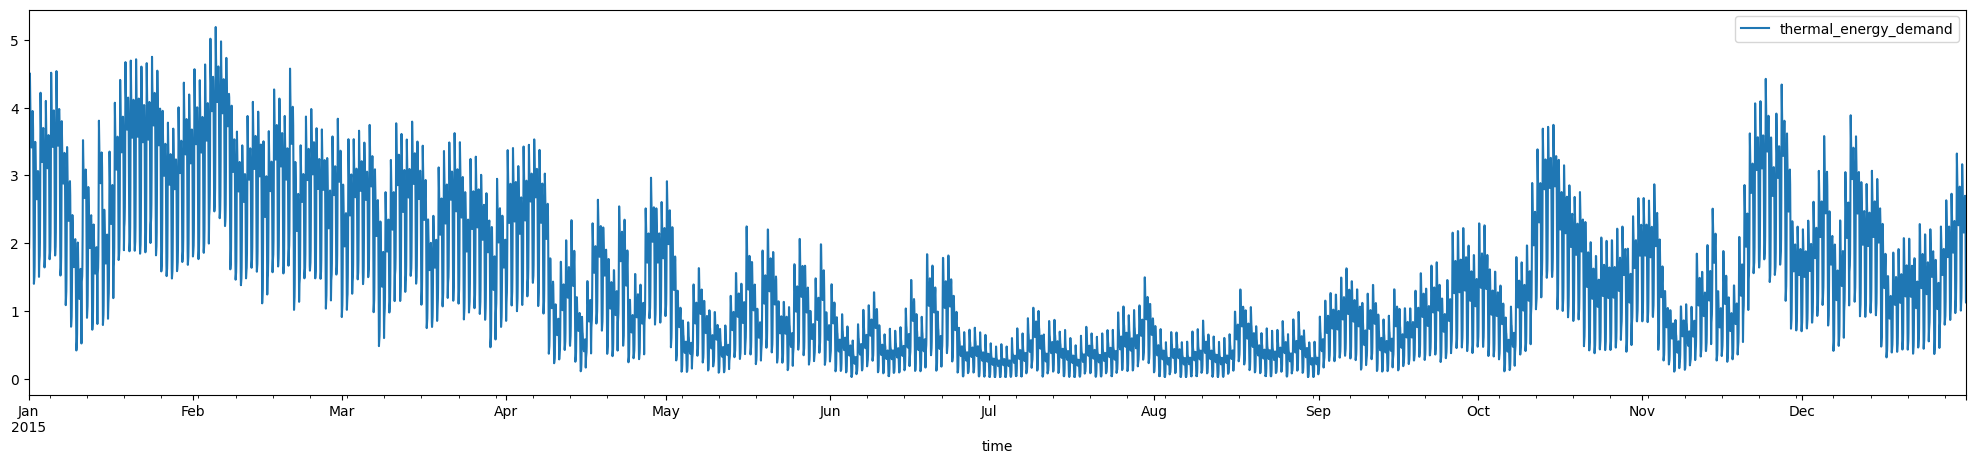

In [16]:
from vpplib.heat_pump import HeatPump

#Values for user_profile
thermal_energy_demand_yearly = 12500 # kWh
building_type = 'DE_HEF33'
t_0 = 40 # °C

user_profile.thermal_energy_demand_yearly=thermal_energy_demand_yearly
user_profile.building_type = building_type
user_profile.t_0=t_0

user_profile.get_thermal_energy_demand()
user_profile.thermal_energy_demand.plot(figsize=(25,5))

In [17]:
#Values for Heatpump
el_power = 5 #kW electric
th_power = 8  # kW thermal
heat_pump_type = "Air"
heat_sys_temp = 60
ramp_up_time = 1/15 #timesteps
ramp_down_time = 1/15 #timesteps
min_runtime = 1 #timesteps
min_stop_time = 2 #timesteps
unit="kW"

hp = HeatPump(
    heat_pump_type=heat_pump_type,
    heat_sys_temp=heat_sys_temp,
    el_power=el_power,
    th_power=th_power,
    ramp_up_time = ramp_up_time, 
    ramp_down_time = ramp_down_time, 
    min_runtime = min_runtime, 
    min_stop_time = min_stop_time,
    unit=unit,
    identifier=(identifier+'_hp'),
    environment=environment,
    user_profile = user_profile
    )

In [18]:
%%capture
hp.prepare_time_series()

<Axes: xlabel='time'>

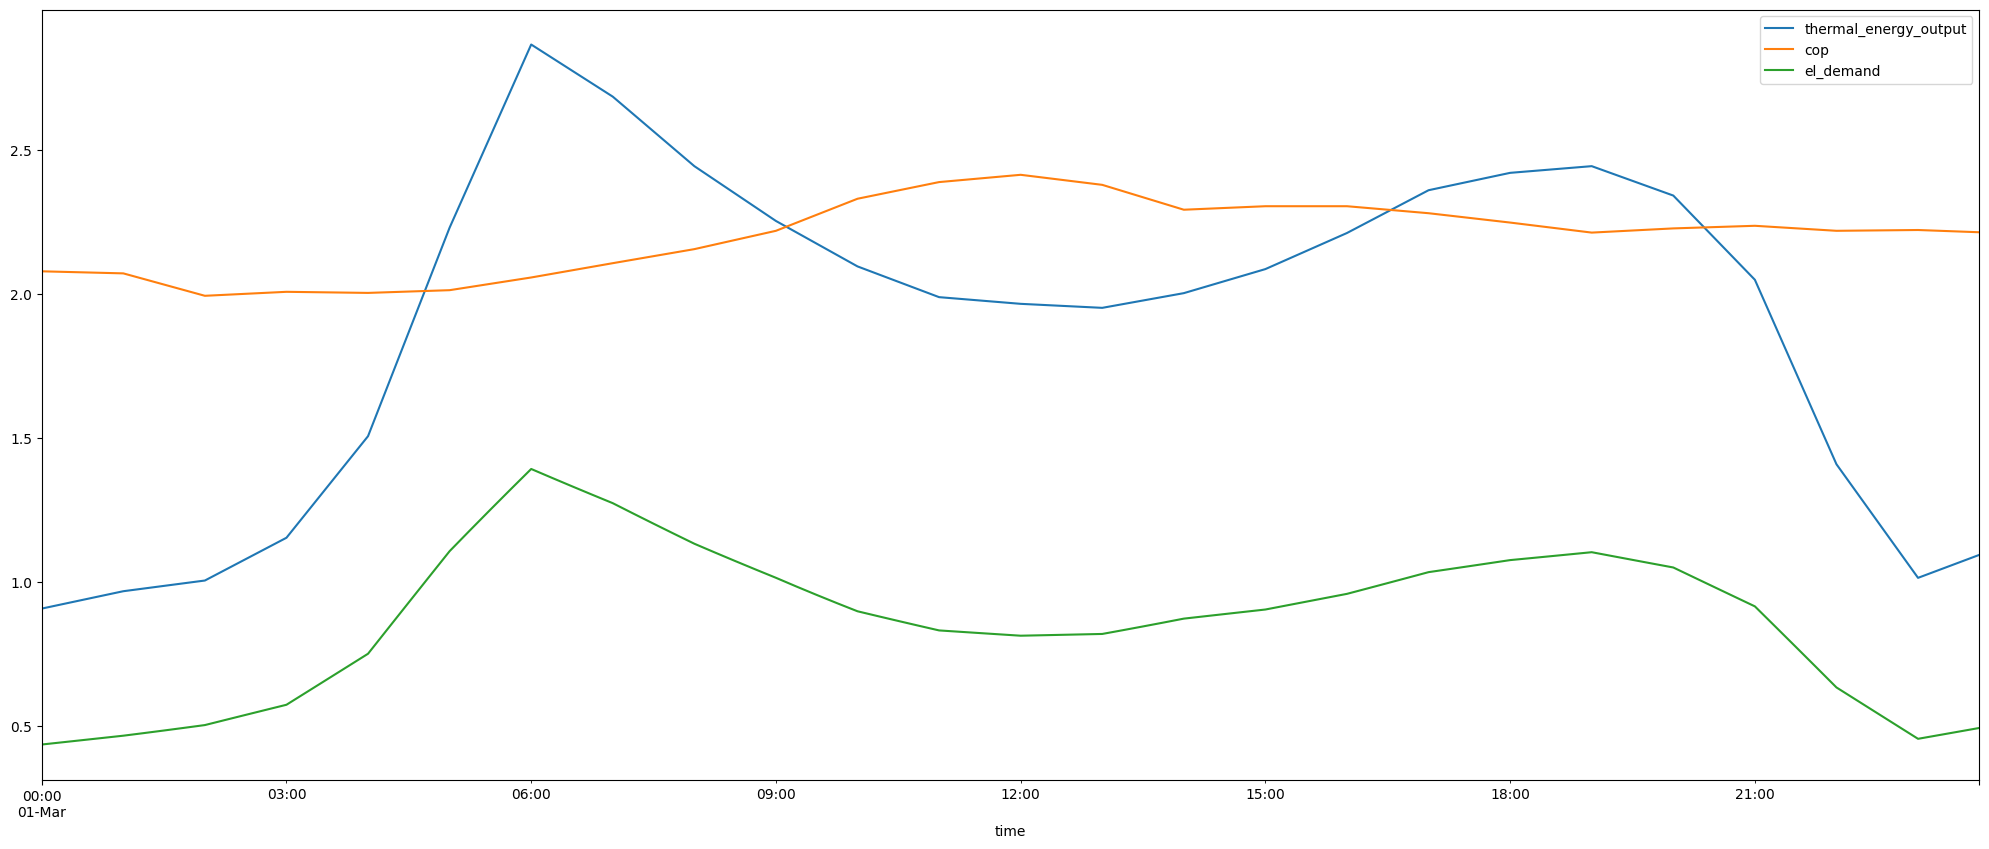

In [19]:
hp.timeseries.plot(figsize=(25,10))

# Home Storage

In [20]:
from vpplib.electrical_energy_storage import ElectricalEnergyStorage

#storage
charge_efficiency_hs = 0.98
discharge_efficiency_hs = 0.98
max_power = 4 #kW
capacity = 4 #kWh
max_c = 1 #factor between 0.5 and 1.2

In [21]:
storage = ElectricalEnergyStorage(unit = unit, identifier=(identifier+'_storage'), 
                                    environment = environment, 
                                    user_profile = user_profile, 
                                    capacity=capacity, 
                                    charge_efficiency=charge_efficiency_hs, 
                                    discharge_efficiency=discharge_efficiency_hs, 
                                    max_power=max_power, max_c=max_c)

# Home Storage

In [22]:
# get baseload
baseload = pd.read_csv(os.path.join(os.path.abspath(""),"../input/baseload/df_S_15min.csv"))
baseload.drop(columns=["Time"], inplace=True)
baseload.set_index(environment.pv_data.index, inplace = True)
baseload.index = pd.to_datetime(baseload.index)

<Axes: xlabel='time'>

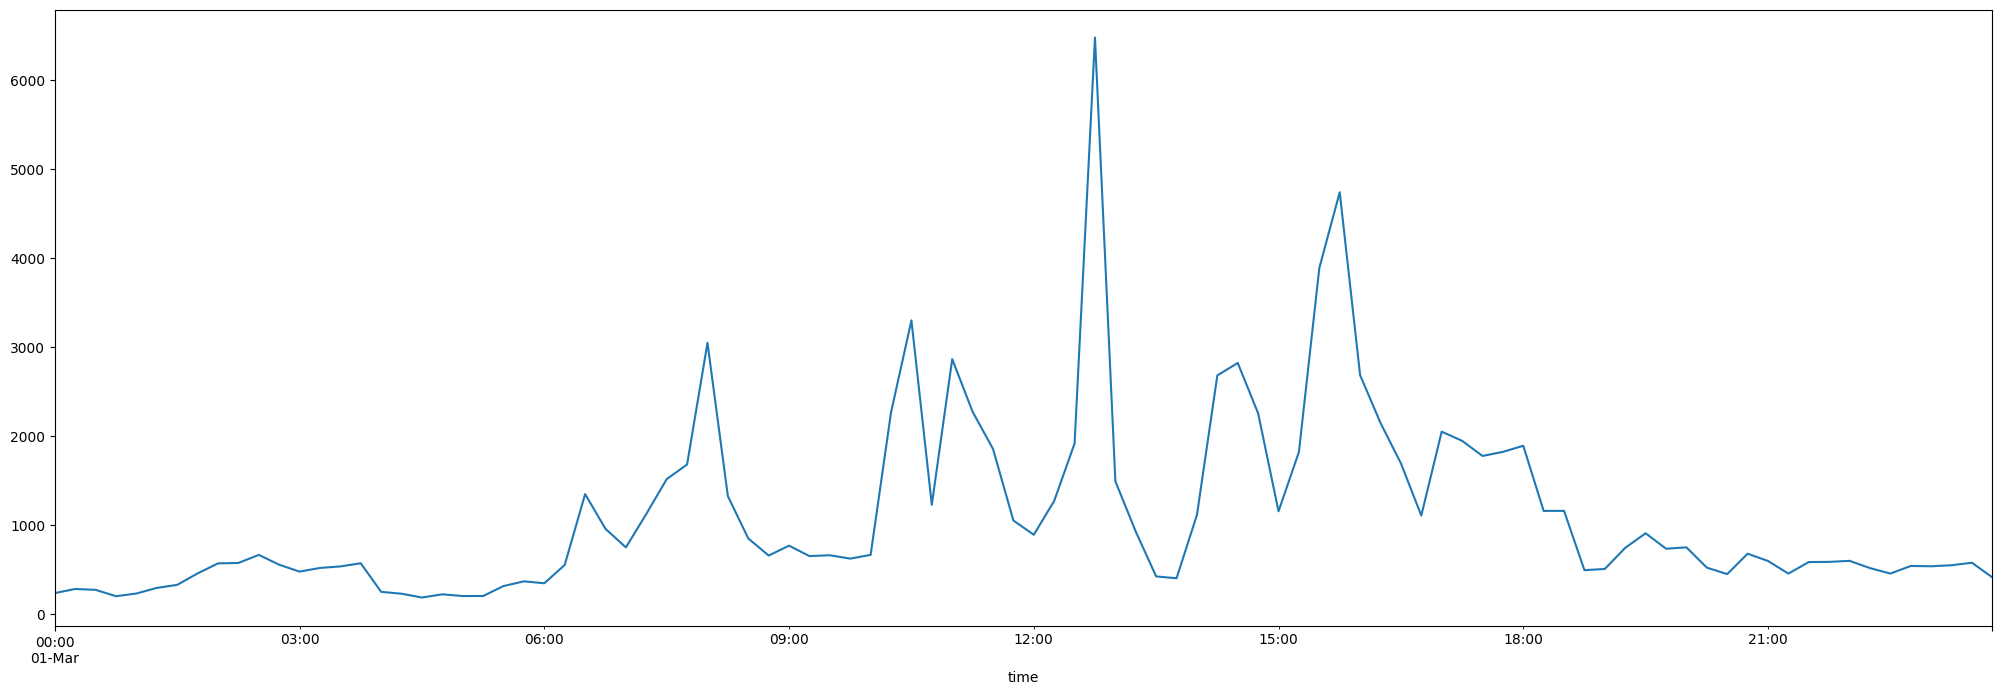

In [23]:
baseload[start:end]['1'].plot(figsize=(25,8))

# Home Storage
### combine pv and baseload timeseries to get the residual load

In [24]:
storage.residual_load = baseload['1'].loc[start:end]/1000 - pv.timeseries.CIRE_pv

<Axes: xlabel='time'>

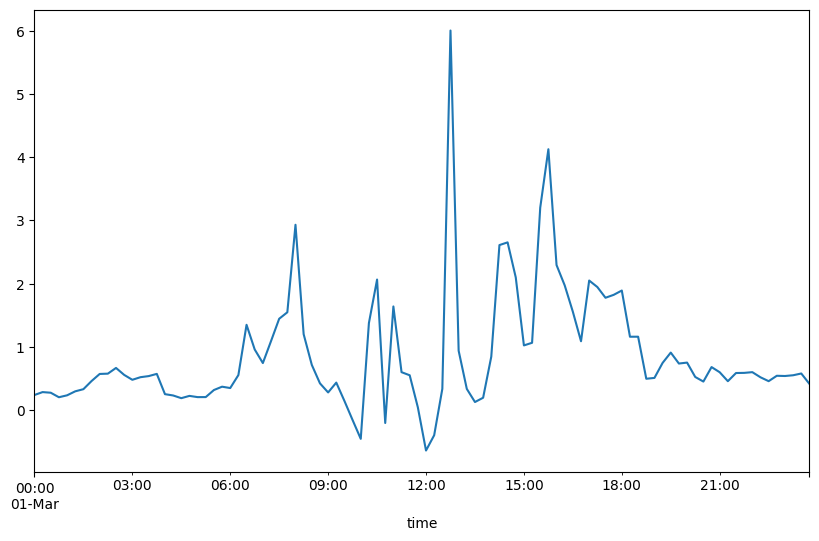

In [25]:
storage.residual_load.plot(figsize=figsize)

<Axes: xlabel='time'>

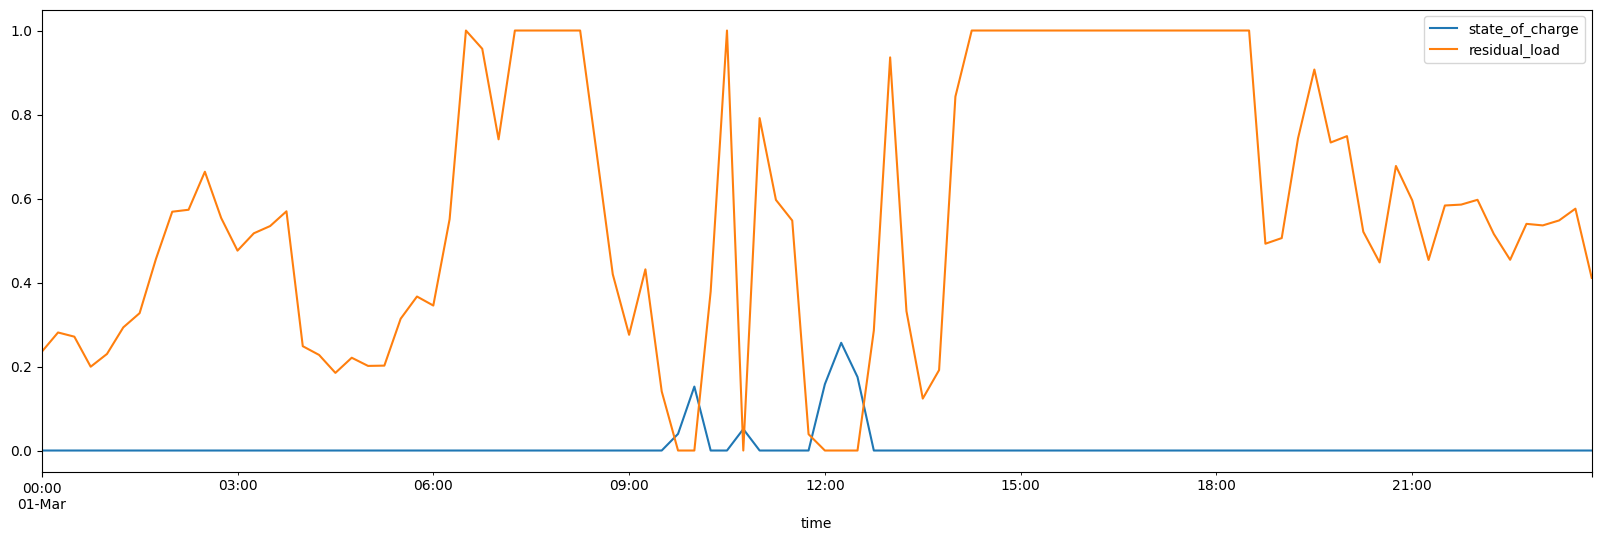

In [26]:
storage.prepare_time_series()

storage.timeseries.plot(figsize=(20,6))

![house_model](./presentation/House.png)

* Adding flexibility for the heat pump with a thermal storage
![house_w_therm_storage](./presentation/House_thermal.png)

## Add a thermal storage

In [27]:
%%capture
from vpplib.thermal_energy_storage import ThermalEnergyStorage
import pandas as pd

#Values for Thermal Storage
target_temperature = 60 # °C
min_temperature = 0 # °C
hysteresis = 5 # °K
mass_of_storage = 500 # kg    
cp = 4.2
thermal_energy_loss_per_day = 0.13
unit="kW"

tes = ThermalEnergyStorage(
    target_temperature=target_temperature,
    min_temperature=min_temperature,
    hysteresis=hysteresis,
    mass=mass_of_storage,
    cp=cp,
    thermal_energy_loss_per_day=thermal_energy_loss_per_day,
    unit=unit,
    environment=environment,
    user_profile=user_profile
    )

hp.prepare_time_series()

# Operate the Storage with a given heat generator

<b>Formula:</b> E = m * cp * T
--> T = E / (m * cp)

In [28]:
# for i in tes.user_profile.thermal_energy_demand.loc[start:end].index:
#     tes.operate_storage(i, hp)

# tes.timeseries.dropna(inplace=True)

# tes.timeseries.plot(figsize = figsize, title = "Temperature of Storage during timeseries")

## Plot timeseries for heat pump with thermal storage

<Axes: title={'center': 'Heat pump timeseries'}, xlabel='time'>

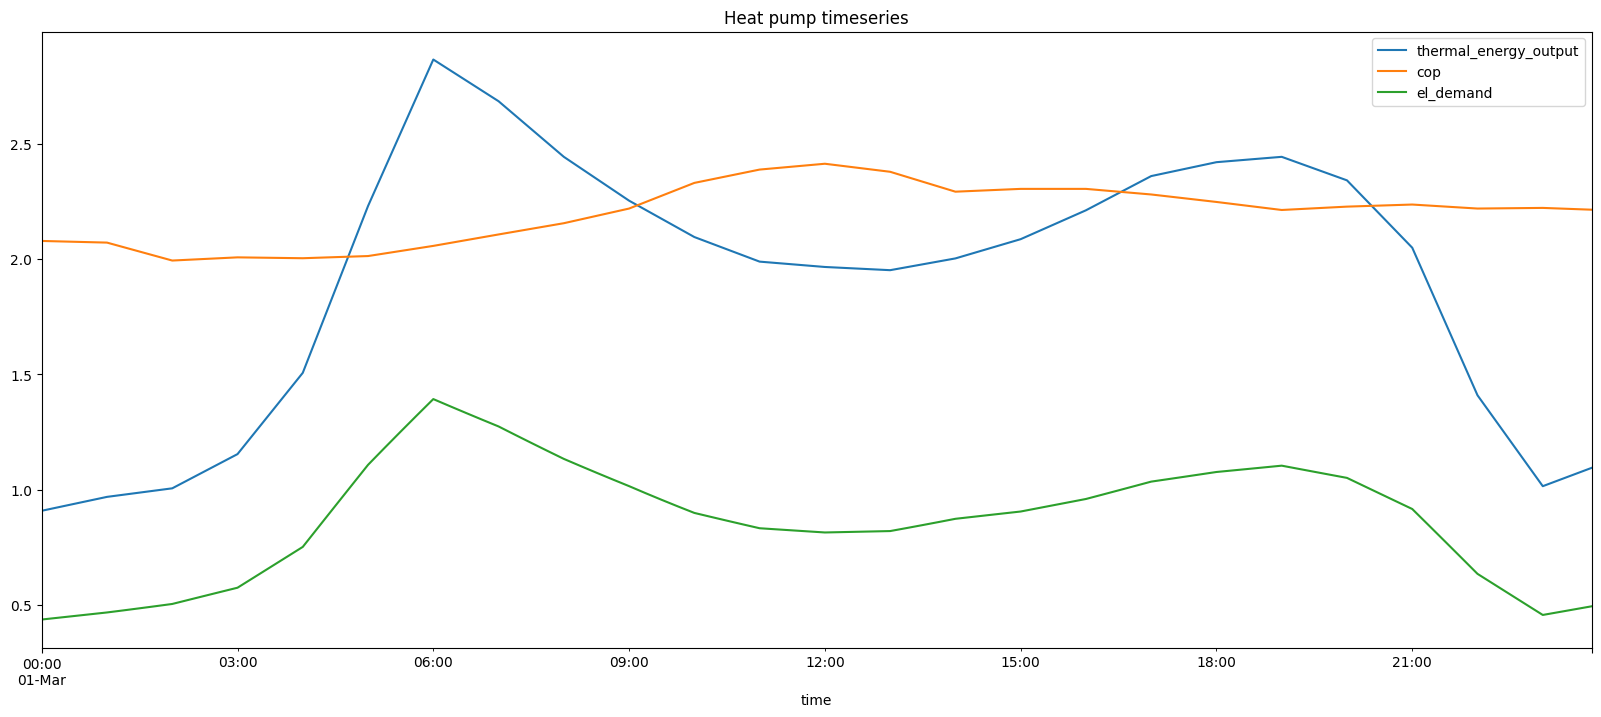

In [29]:
hp.timeseries.plot(figsize = (20,8), title = "Heat pump timeseries")

# Windpowerlib

* library that provides a set of functions and classes to calculate the power output of wind turbines
+ contains data for for various wind turbines

In [32]:
from windpowerlib import get_turbine_types
df = get_turbine_types()

       manufacturer  turbine_type  has_power_curve  has_cp_curve
0       Adwen/Areva    AD116/5000             True         False
1           Enercon    E-101/3050             True          True
2           Enercon    E-101/3500             True          True
3           Enercon    E-115/3000             True          True
4           Enercon    E-115/3200             True          True
5           Enercon    E-126/4200             True          True
6           Enercon    E-126/7500             True         False
7           Enercon    E-126/7580             True         False
8           Enercon    E-141/4200             True          True
9           Enercon      E-53/800             True          True
10          Enercon     E-70/2000             True         False
11          Enercon     E-70/2300             True          True
12          Enercon     E-82/2000             True          True
13          Enercon     E-82/2300             True          True
14          Enercon     E

In [33]:
# find all Enercons
print(df[df["manufacturer"].str.contains("Enercon")])

   manufacturer turbine_type  has_power_curve  has_cp_curve
1       Enercon   E-101/3050             True          True
2       Enercon   E-101/3500             True          True
3       Enercon   E-115/3000             True          True
4       Enercon   E-115/3200             True          True
5       Enercon   E-126/4200             True          True
6       Enercon   E-126/7500             True         False
7       Enercon   E-126/7580             True         False
8       Enercon   E-141/4200             True          True
9       Enercon     E-53/800             True          True
10      Enercon    E-70/2000             True         False
11      Enercon    E-70/2300             True          True
12      Enercon    E-82/2000             True          True
13      Enercon    E-82/2300             True          True
14      Enercon    E-82/2350             True          True
15      Enercon    E-82/3000             True          True
16      Enercon    E-92/2350            

# Windpowerlib inside VPPlib

In [35]:
%%capture
from vpplib.wind_power import WindPower

environment.get_wind_data(file="../input/wind/dwd_wind_data_2015.csv", 
                          utc=False)

In [36]:
#WindTurbine data
turbine_type = 'E-126/4200'
hub_height = 135
rotor_diameter = 127
fetch_curve = 'power_curve'
data_source = 'oedb'

#ModelChain data
wind_speed_model = 'logarithmic'
density_model = 'ideal_gas'
temperature_model = 'linear_gradient'
power_output_model = 'power_coefficient_curve'#'power_curve'
density_correction = True
obstacle_height = 0
hellman_exp = None

## Windpowerlib inside VPPlib - get wind turbine

In [37]:
wind = WindPower(unit=unit, identifier=(identifier+'_wind'), 
                 environment = environment, user_profile=user_profile,
                 turbine_type = turbine_type, hub_height = hub_height,
                 rotor_diameter = rotor_diameter, fetch_curve = fetch_curve,
                 data_source = data_source,
                 wind_speed_model = wind_speed_model, 
                 density_model = density_model,
                 temperature_model = temperature_model, 
                 power_output_model = power_output_model, 
                 density_correction = density_correction,
                 obstacle_height = obstacle_height, hellman_exp = hellman_exp)

<Axes: xlabel='Time'>

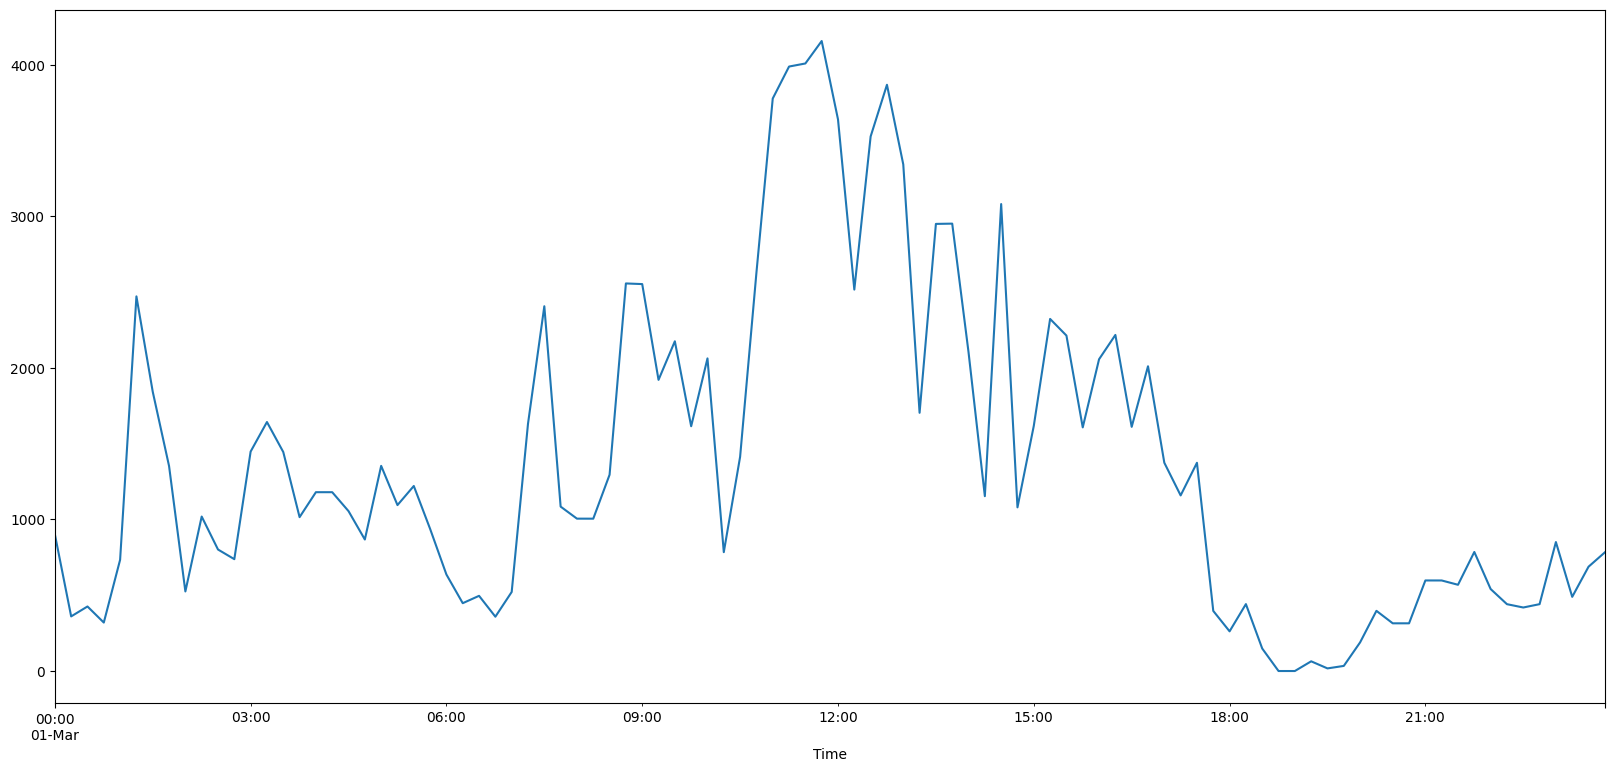

In [38]:
wind.prepare_time_series()
wind.timeseries.plot(figsize=(20,9))

![house_w_wind](./presentation/house_w_wind.png)

![grid](./presentation/grid.png)

# Pandapower
* open source tool for power system analysis
+ contains ready to use electrical grids
+ contains switches among other network elements

+ capable of:
    + powerflow and ac optimal powerflow
    + short circuit calculations
    + state estimation
    + topology search

In [39]:
from IPython.display import IFrame
IFrame('https://pandapower.readthedocs.io/en/v2.1.0/networks.html', width='100%', height=700)

# Structure of VPPlib
___________________
![user_profile](./presentation/Aufbau_vpplib/component.png)

# Simulations with VPPlib

In [40]:
# Virtual Power Plant to aggregate all energy devices
from vpplib.virtual_power_plant import VirtualPowerPlant
vpp = VirtualPowerPlant("Master_VPP")

In [41]:
import pandapower as pp
import pandapower.networks as pn

# choosa a grid in which the vpp will be running
net = pn.panda_four_load_branch()

# do some initialization for later p and q assignment of loads
for bus in net.bus.index:
    
    net.load.name[net.load.bus == bus] = net.bus.name[bus]+'_baseload'
    net.load.type[net.load.bus == bus] = 'baseload'

print(net)

This pandapower network includes the following parameter tables:
   - bus (6 elements)
   - load (4 elements)
   - ext_grid (1 element)
   - line (4 elements)
   - trafo (1 element)
   - bus_geodata (6 elements)


In [54]:
#environment
start = '2015-03-01 00:00:00'
end = '2015-03-01 23:45:00'
timezone = 'Europe/Berlin'
year = '2015'
time_freq = "15 min"
timebase=15
index=pd.date_range(start=start, end=end, freq=time_freq)
temp_days_file = "../input/thermal/dwd_temp_days_2015.csv"
temp_hours_file = "../input/thermal/dwd_temp_hours_2015.csv"

#user_profile
identifier = "bus_1"
latitude = 50.941357
longitude = 6.958307
thermal_energy_demand_yearly = 12500
comfort_factor=None
daily_vehicle_usage=None
building_type = 'DE_HEF33'
t_0 = 40
week_trip_start=[]
week_trip_end=[]
weekend_trip_start=[]
weekend_trip_end=[]

baseload = pd.read_csv("../input/baseload/df_S_15min.csv")
baseload.drop(columns=["Time"], inplace=True)
baseload.index =  pd.date_range(start=year, periods = 35040, freq=time_freq, name ='time')

unit = "kW"

#WindTurbine data
turbine_type = 'E48/800'
hub_height = 60
rotor_diameter = 48
fetch_curve = 'power_curve'
data_source = 'oedb'

#Wind ModelChain data
wind_file = "../input/wind/dwd_wind_data_2015.csv"
wind_speed_model = 'logarithmic'
density_model = 'ideal_gas'
temperature_model = 'linear_gradient'
power_output_model = 'power_curve'
density_correction = True
obstacle_height = 0
hellman_exp = None

#PV data
pv_file = "../input/pv/dwd_pv_data_2015.csv"
module_lib = 'SandiaMod'
module = 'Canadian_Solar_CS5P_220M___2009_'
inverter_lib = 'cecinverter'
inverter = 'ABB__PVI_3_0_OUTD_S_US__208V_'
surface_tilt = 20, 
surface_azimuth = 200
modules_per_string = 4
strings_per_inverter = 2
temp_lib='sapm'
temp_model='open_rack_glass_glass'

#BEV data
battery_max = 16
battery_min = 0
battery_usage = 1
charging_power = 11
charge_efficiency_bev = 0.98

#heat pump data
heatpump_type="Air"
heat_sys_temp=60
el_power=5
building_type = 'DE_HEF33'

#storage
charge_efficiency_storage = 0.98
discharge_efficiency_storage = 0.98
max_power = 4 #kW
capacity = 4 #kWh
max_c = 1 #factor between 0.5 and 1.2


In [55]:
%%capture
# environment

environment = Environment(timebase=timebase, timezone=timezone, 
                            start=start, end=end, year=year,
                            time_freq=time_freq)

environment.get_wind_data(file=wind_file, utc=False)
environment.get_pv_data(file=pv_file)
environment.get_mean_temp_days(file=temp_days_file)
environment.get_mean_temp_hours(file=temp_hours_file)

#%% user profile

user_profile = UserProfile(identifier=identifier,
                            latitude=latitude,
                            longitude=longitude,
                            thermal_energy_demand_yearly=thermal_energy_demand_yearly,
                            building_type=building_type,
                            comfort_factor=comfort_factor,
                            t_0=t_0,
                            daily_vehicle_usage=daily_vehicle_usage,
                            week_trip_start=week_trip_start, 
                            week_trip_end=week_trip_end,
                            weekend_trip_start=weekend_trip_start, 
                            weekend_trip_end=weekend_trip_end)

user_profile.get_thermal_energy_demand()

# Structure of VPPlib
___________
![user_profile](./presentation/Aufbau_vpplib/vpp_network.png)

In [56]:
# create instance of VirtualPowerPlant and the designated grid
vpp = VirtualPowerPlant("Master")

net = pn.panda_four_load_branch()

# assign names and types to baseloads for later p and q assignment
for bus in net.bus.index:
    
    net.load.name[net.load.bus == bus] = net.bus.name[bus]+'_baseload'
    net.load.type[net.load.bus == bus] = 'baseload'

In [57]:
# choose busses for the components in the grid (can be done automatically)
vpp.buses_with_pv = ['bus3', 'bus4', 'bus5', 'bus6']
vpp.buses_with_hp = ['bus4']
vpp.buses_with_bev = ['bus5']
vpp.buses_with_storage = ['bus5']
vpp.buses_with_wind = ['bus1']

In [59]:
# create components and assign components to the Virtual Powerplant

for bus in vpp.buses_with_pv:
    
    vpp.add_component(Photovoltaic(unit=unit, identifier=(bus+'_PV'),  
                                     environment = environment, 
                                     user_profile = user_profile,
                                     module_lib = module_lib, 
                                     module = module, 
                                     inverter_lib = inverter_lib, 
                                     inverter = inverter,
                                     surface_tilt = surface_tilt, 
                                     surface_azimuth = surface_azimuth,
                                     modules_per_string = modules_per_string, 
                                     strings_per_inverter = strings_per_inverter,
                                     temp_lib=temp_lib,
                                     temp_model=temp_model))
    
    vpp.components[list(vpp.components.keys())[-1]].prepare_time_series()
    
    
for bus in vpp.buses_with_storage:
    
    vpp.add_component(ElectricalEnergyStorage(unit=unit, 
                                            identifier=(bus+'_storage'), 
                                            environment=environment, 
                                            user_profile=user_profile, 
                                            capacity=capacity, 
                                            charge_efficiency=charge_efficiency_storage, 
                                            discharge_efficiency=discharge_efficiency_storage, 
                                            max_power=max_power, max_c=max_c))
    
    vpp.components[
            list(vpp.components.keys())[-1]].timeseries = pd.DataFrame(
            columns=['state_of_charge','residual_load'], 
            index=pd.date_range(start=start, end=end, freq=time_freq))
    
    
for bus in vpp.buses_with_bev:
    
    vpp.add_component(BatteryElectricVehicle(unit=unit, identifier=(bus+'_BEV'), 
                                            environment=environment, user_profile=user_profile, 
                                            battery_max=battery_max, battery_min=battery_min, 
                                            battery_usage=battery_usage, 
                                            charging_power=charging_power, 
                                            charge_efficiency=charge_efficiency_bev,
                                            load_degradation_begin=load_degradation_begin))
    
    vpp.components[list(vpp.components.keys())[-1]].prepare_time_series()
    
    
for bus in vpp.buses_with_hp:
    
    vpp.add_component(HeatPump(unit=unit,identifier=(bus+'_HP'),  
                                environment=environment, 
                                user_profile=user_profile,
                                heatpump_type=heatpump_type, 
                                heat_sys_temp=heat_sys_temp, 
                                el_power=el_power))
    
    vpp.components[list(vpp.components.keys())[-1]].prepare_time_series()
    
for bus in vpp.buses_with_wind:
    
    vpp.add_component(WindPower(unit=unit, identifier = (bus+'_Wind'), 
                                environment=environment, user_profile=user_profile,
                                turbine_type=turbine_type, hub_height=hub_height,
                                rotor_diameter=rotor_diameter, fetch_curve=fetch_curve,
                                data_source=data_source,
                                wind_speed_model=wind_speed_model, 
                                density_model=density_model,
                                temperature_model=temperature_model, 
                                power_output_model=power_output_model, 
                                density_correction=density_correction,
                                obstacle_height=obstacle_height, 
                                hellman_exp=hellman_exp))
    
    vpp.components[list(vpp.components.keys())[-1]].prepare_time_series()

TypeError: 'NoneType' object is not iterable

In [ ]:
# create elements in the pandapower.net

for bus in vpp.buses_with_pv:
    
    pp.create_sgen(net, bus=net.bus[net.bus.name == bus].index[0], 
                  p_mw=(vpp.components[bus+'_PV'].module.Impo*vpp.components[bus+'_PV'].module.Vmpo/1000000),
                  name=(bus+'_PV'), type = 'PV')    

for bus in vpp.buses_with_storage:
    
    pp.create_storage(net, bus=net.bus[net.bus.name == bus].index[0],
                      p_mw=0, max_e_mwh=capacity, name=(bus+'_storage'), type='LiIon')
  
for bus in vpp.buses_with_bev:
    
    pp.create_load(net, bus=net.bus[net.bus.name == bus].index[0], 
                   p_mw=(vpp.components[bus+'_BEV'].charging_power/1000), name=(bus+'_BEV'), type='BEV')
    
for bus in vpp.buses_with_hp:
    
    pp.create_load(net, bus=net.bus[net.bus.name == bus].index[0], 
                   p_mw=(vpp.components[bus+'_HP'].el_power/1000), name=(bus+'_HP'), type='HP')
    
for bus in vpp.buses_with_wind:
    
    pp.create_sgen(net, bus=net.bus[net.bus.name == bus].index[0], 
                  p_mw=(vpp.components[bus+'_Wind'].wind_turbine.nominal_power/1000000),
                  name=(bus+'_Wind'), type = 'Wind')
  

## VPPlib - operator class
* used to define operation strategies for a virtual power plant and the corresponding grid
_______________
<div>
<img src="./presentation/Aufbau_vpplib/operator.png" width="1100"/>
</div>

In [ ]:
from vpplib.operator import Operator

# initialize operator

operator = Operator(virtual_power_plant=vpp, net=net, target_data=None)

In [ ]:
# run base_scenario without operation strategies

net_dict = operator.run_base_scenario(baseload)    

In [ ]:
# extract results from powerflow

results = operator.extract_results(net_dict)

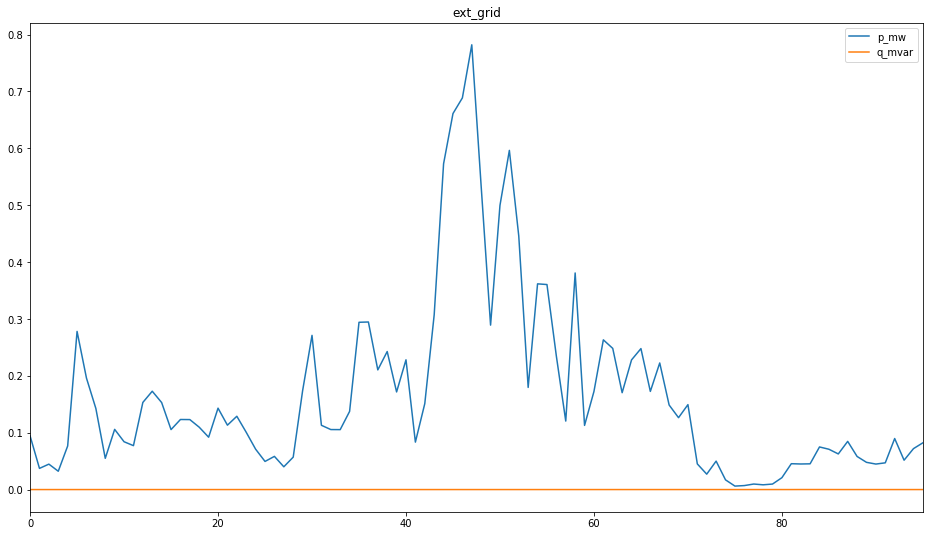

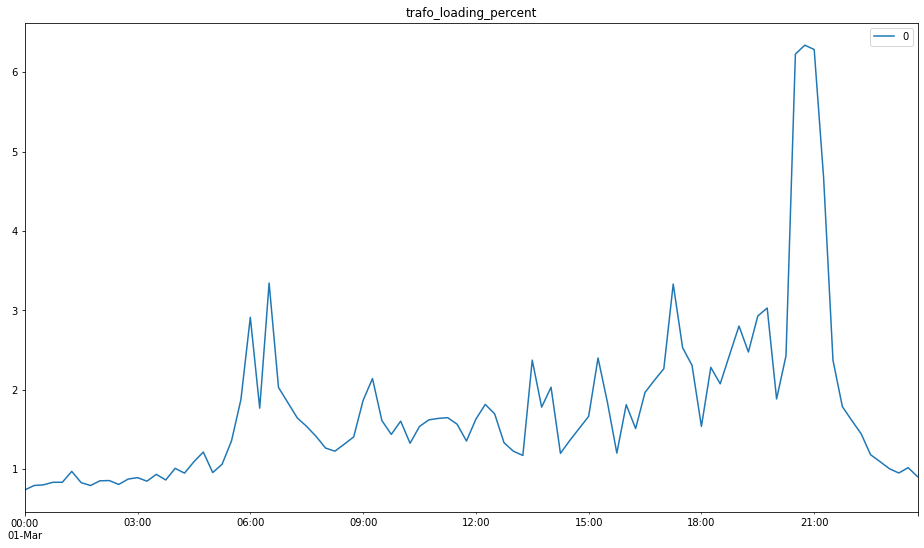

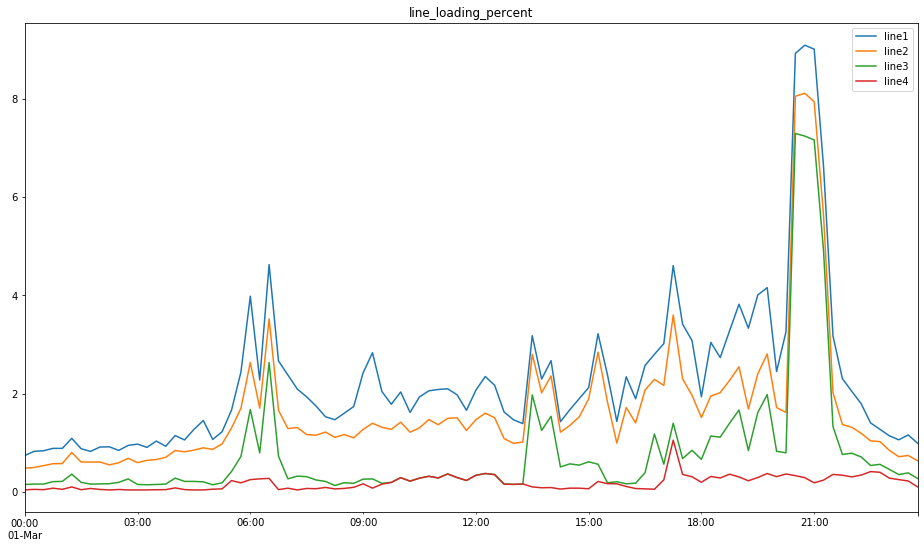

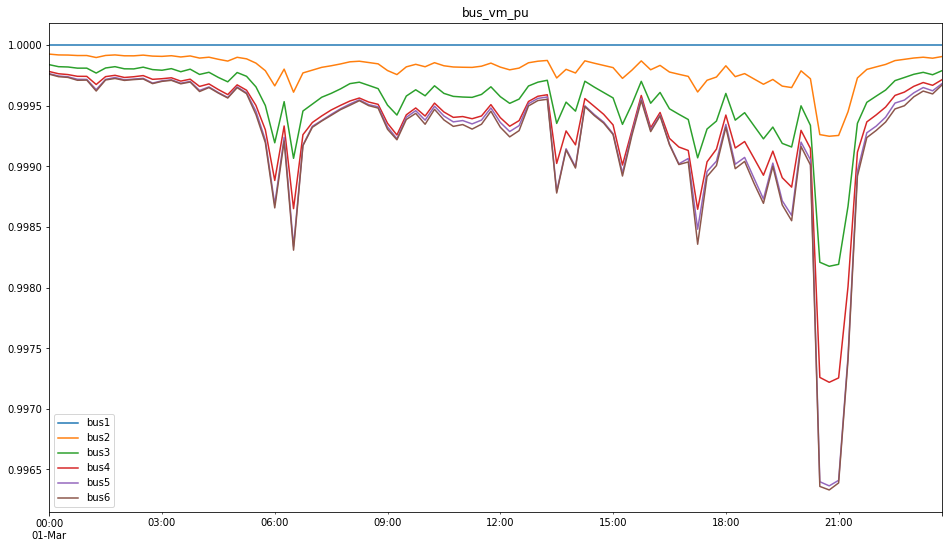

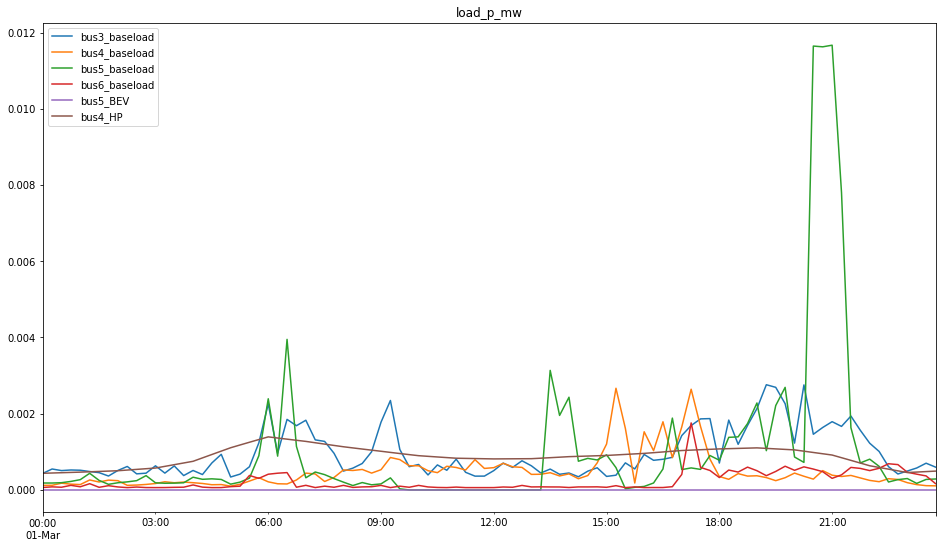

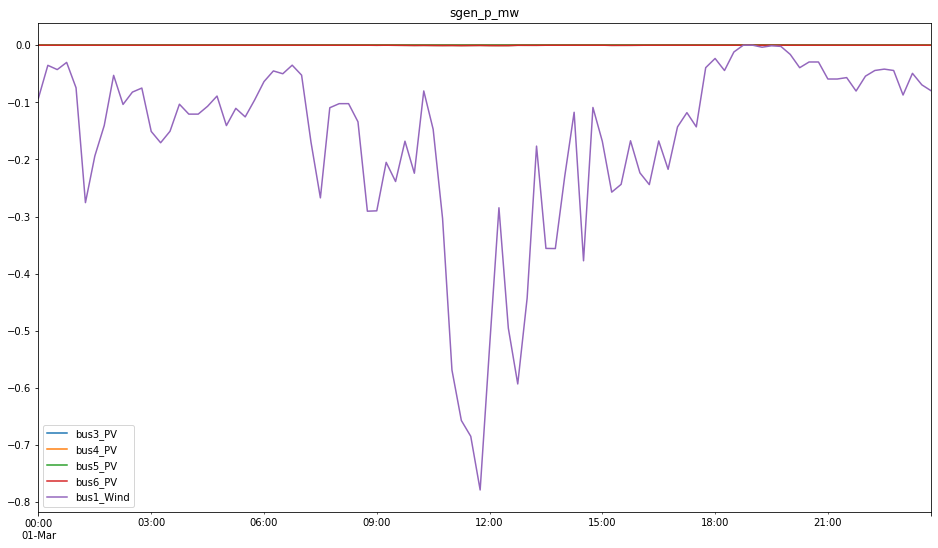

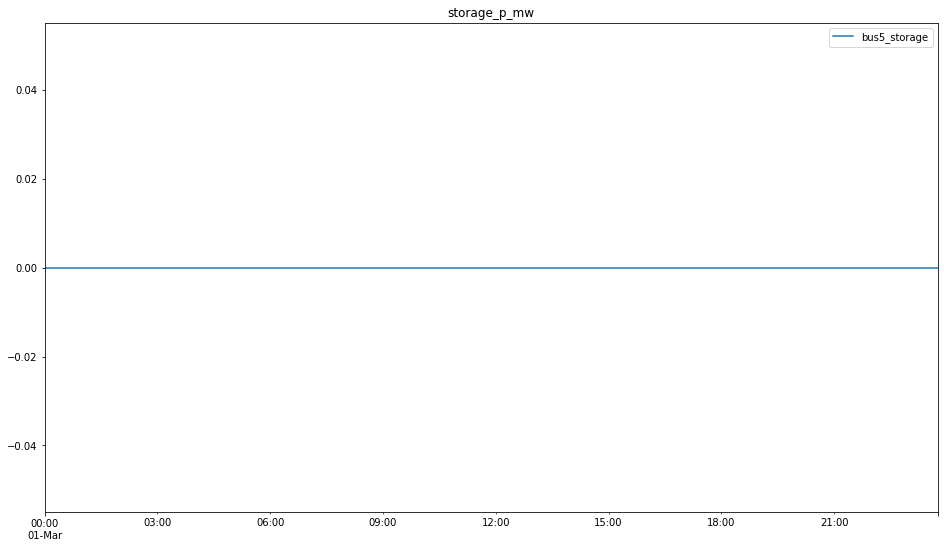

In [ ]:
# plot results of powerflow

operator.plot_results(results)

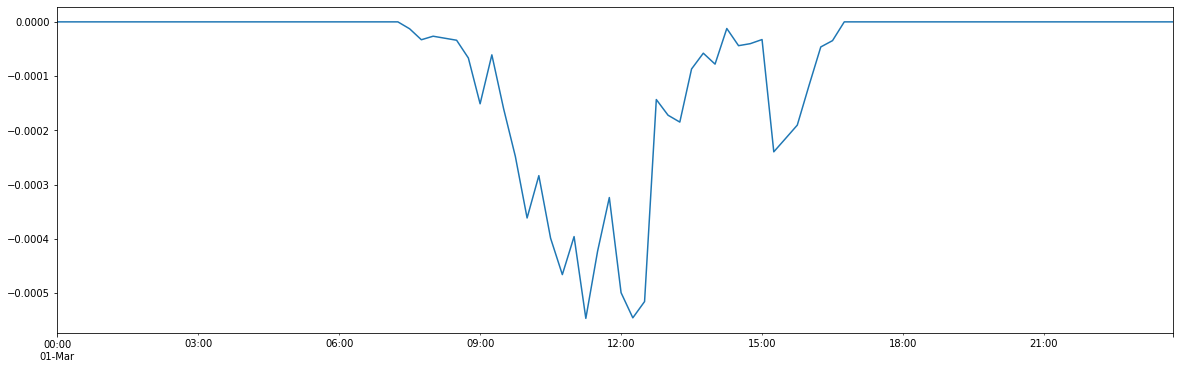

In [ ]:
results['sgen_p_mw']['bus3_PV'].plot(figsize=(20,6))

# The best material model of a cat is another, or preferably the same, cat.

#### Norbert Wiener, Philosophy of Science (1945)
    

# Thank you for your attention

# Resources

1. William F. Holmgren, Clifford W. Hansen, and Mark A. Mikofski. “pvlib python: a python package for modeling solar energy systems.” Journal of Open Source Software, 3(29), 884, (2018). https://doi.org/10.21105/joss.00884 

2.  Sabine Haas, Birgit Schachler, Uwe Krien, & Stephen Bosch. (2019, September 9). wind-python/windpowerlib: Revision release (Version v0.2.0). Zenodo. http://doi.org/10.5281/zenodo.3403360 

2. L. Thurner, A. Scheidler, F. Schäfer et al, pandapower - an Open Source Python Tool for Convenient Modeling, Analysis and Optimization of Electric Power Systems, in IEEE Transactions on Power Systems, vol. 33, no. 6, pp. 6510-6521, Nov. 2018.